In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint, random, seed

In [8]:
TRAIN_PATH = 'dataset/train1x5.csv'
TEST_PATH = 'dataset/test1x5.csv'

train1x5 = pd.read_csv(TRAIN_PATH)
test1x5 = pd.read_csv(TEST_PATH)

Construindo vetores

In [9]:
X_train = [(x,y) for x, y in zip(train1x5['intensidade'], train1x5['simetria'])]
y_train = train1x5['label']

X_test = [(x,y) for x, y in zip(test1x5['intensidade'], test1x5['simetria'])]
y_test = test1x5['label']

# Regressão Linear

# Perceptron [ta bem sujo]

- naoo usar o w da RL
- Pesquisar sobre pocket PLA
- Tem que ser max_iter = n de pontos
- Guardar a melhor solução
- w pode comecar com 0 ou random

In [11]:

np.zeros(2)

array([0., 0.])

A linha de decisão é dada pela equação: $w_1x_1+w_2x_2+b=0$, onde $w_1 e w_2$​ são os pesos e b é o viés.

$h(x) = sign(w^Tx)$

$w=w+y_ix_i$

In [12]:
class PocketPla():
    def __init__(self,max_iter):
        self.max_iter = max_iter
        self.best_w = None
        self.best_eIN = None
        self.iterations = 0


    def constroiListaPCI(self,X,y,w):
        listaPCI = [i for i in range(len(X)) if np.sign(np.dot(X[i], w)) != y[i]]
        return listaPCI
    
    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        return np.sign(np.dot(X, self.best_w))
    
    def getW(self): 
        return self.best_w
    
    def h(self, x): # função de ativação
        x = np.column_stack((np.ones(len(x)), x))
        return np.sign(np.dot(self.best_w, x))
    
    def getOriginalY(self, originalX):
        return (-self.best_w[0] - self.best_w[1]*originalX) / self.best_w[2]
    
    def getIterations(self):
        return self.iterations
    
    def getBestEin(self,X):
        return self.best_eIN/len(X)

    def fit(self, X, y):
        X = np.column_stack((np.ones(len(X)), X))
        w = [0,0,0]
        self.best_w = w.copy()

        for _ in range(self.max_iter):
            self.iterations += 1
            listaPCI = self.constroiListaPCI(X,y,w)

            if len(listaPCI) == 0:
                break

            i = np.random.choice(listaPCI) # escolhe um índice aleatório da lista PCI
            w = w + y[i]*X[i] # atualizaÇÃO do vetor de pesos
            error_count = len(self.constroiListaPCI(X,y,w)) # calcula o erro de classificação

            if self.best_eIN is None or error_count < self.best_eIN:
                self.best_eIN = error_count
                self.best_w = w
    
        return self

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train_transformed = np.where(y_train == 1, 1, -1) # transformando 1 em 1 e 5 em -1
n = X_train.shape[0]
PLA = PocketPla(n)
PLA.fit(X_train, y_train_transformed)
w = PLA.getW()
w


array([ 276.        , -180.65098039,  119.88235294])

In [14]:
y_train_transformed

array([ 1,  1,  1, ..., -1, -1, -1])

In [15]:
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test_transformed = np.where(y_test == 1, 1, -1)
y_pred = PLA.predict(X_test)
#y_pred

In [16]:
accuracy = np.mean(y_pred == y_test_transformed)
accuracy

0.6655231560891939

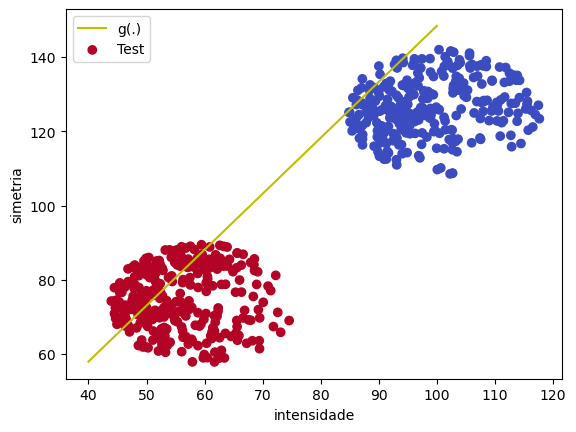

In [17]:
xOri = [40, 100]
yOri = [PLA.getOriginalY(xOri[0]), PLA.getOriginalY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='g(.)')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_transformed, cmap='coolwarm', label='Test')
plt.xlabel('intensidade')
plt.ylabel('simetria')
plt.legend()
plt.show()


Linear Regression

vetor de pesos $w=(X^TX)^{-1}X^Ty$

In [33]:
class LinearRegression():
    def __init__(self):
        self.w = None

    def getW(self):
        return self.w
    
    def fit(self, _X, _y):
        s = _X.shape[0]
        X = np.column_stack((np.ones(s), _X))
        self.w = np.linalg.inv(X.T @ X) @ X.T @ _y
        return self
    
    def predict(self, _X):
        if self.w is None:
            raise Exception('Modelo não treinado')
        s = _X.shape[0]
        X = np.column_stack((np.ones(s), _X))
        return X @ self.w
    

class LRClassifier():
    def execute(self, _X, _y):
        lr = LinearRegression()
        lr.fit(_X, _y)
        self.w = lr.getW()
                
    def predict(self, x_):
        return np.sign(np.dot(np.insert(x_, 0, 1,axis=1), self.w))
     
    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [36]:
lrc = LRClassifier()
lrc.execute(X_train, y_train_transformed)
w = lrc.w
predictions = lrc.predict(X_test)
accuracy = np.mean(predictions == y_test_transformed)
accuracy

1.0

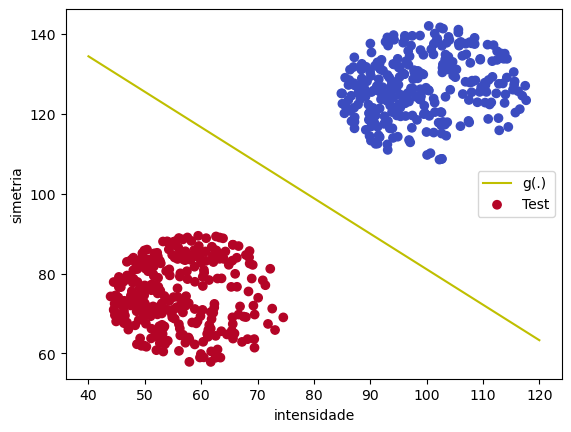

In [48]:
xOri = [40, 120]
yOri = [lrc.getRegressionY(xOri[0]), lrc.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='g(.)')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_transformed, cmap='coolwarm', label='Test')
plt.xlabel('intensidade')
plt.ylabel('simetria')
plt.legend()
plt.show()